
# Proceso ETL y Análisis para TelecomX_Data.json
Este notebook realiza un proceso ETL (Extract, Transform, Load) sobre el archivo `TelecomX_Data.json`, seguido de un análisis y visualización de los datos. El flujo del notebook es el siguiente:
1. **Imports y Configuración**  
2. **Extract**  
3. **Transform**  
4. **Load**  
5. **Análisis y Visualización**  


## 1. Imports y Configuración

In [10]:
# Librerías necesarias para ETL y análisis
import pandas as pd       # para manipulación de datos
import numpy as np        # para operaciones numéricas
import matplotlib.pyplot as plt  # para gráficas

# Configuración opcional de estilo (no se especifican colores)
plt.rcParams['figure.figsize'] = (8, 5)


## 2. Extract

In [11]:
# --- Extract ---
# Carga de datos desde JSON original
df = pd.read_json('TelecomX_Data.json')

# Vista previa rápida de las primeras filas
df.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


## 3. Transform

In [12]:
# --- Transform ---
# Aplanar estructuras JSON anidadas
df_flat = pd.json_normalize(df.to_dict(orient='records'))

# Renombrar columnas para mayor legibilidad
df_flat.columns = df_flat.columns.str.replace(r'\.', '_', regex=True)

# Conversión de tipos
# - Total Charges y Monthly Charges a numérico
df_flat['account_Charges_Total'] = pd.to_numeric(df_flat['account_Charges_Total'], errors='coerce')
df_flat['account_Charges_Monthly'] = pd.to_numeric(df_flat['account_Charges_Monthly'], errors='coerce')

# - Tenure a entero
df_flat['customer_tenure'] = df_flat['customer_tenure'].astype(int)

# Codificar Churn: Yes -> 1, No -> 0
df_flat['Churn_flag'] = df_flat['Churn'].map({'Yes': 1, 'No': 0})

# Crear buckets de tenure
bins = [0, 12, 24, 48, 72, np.inf]
labels = ['0-12','13-24','25-48','49-72','73+']
df_flat['tenure_bucket'] = pd.cut(df_flat['customer_tenure'], bins=bins, labels=labels, right=False)

# Vista previa de la transformación
df_flat.head()


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,Churn_flag,tenure_bucket
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,0.0,0-12
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,0.0,0-12
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,1.0,0-12
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,1.0,13-24
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,1.0,0-12


## 4. Load

In [13]:
# --- Load ---
# Guardar DataFrame limpio en CSV para usos posteriores
output_path = 'TelecomX_Cleaned.csv'
df_flat.to_csv(output_path, index=False)
print(f"Archivo CSV guardado en: {output_path}")


Archivo CSV guardado en: TelecomX_Cleaned.csv


## 5. Análisis y Visualización

### 5.1 Estadísticas Descriptivas

In [14]:
# Mostrar estadísticas descriptivas de todas las columnas
desc_stats = df_flat.describe(include='all')
desc_stats


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,Churn_flag,tenure_bucket
count,7267,7267,7267,7267.000000,7267,7267,7267.000000,7267,7267,7267,...,7267,7267,7267,7267,7267,7267,7267.000000,7256.000000,7043.000000,7267
unique,7267,3,2,NaN,2,2,NaN,2,3,3,...,3,3,3,3,2,4,NaN,NaN,NaN,5
top,9995-HOTOH,No,Male,NaN,No,No,NaN,Yes,No,Fiber optic,...,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,NaN,0-12
freq,1,5174,3675,NaN,3749,5086,NaN,6560,3495,3198,...,3582,2896,2870,4005,4311,2445,NaN,NaN,NaN,2146
mean,NaN,NaN,NaN,0.162653,NaN,NaN,32.346498,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,64.720098,2280.634213,0.265370,NaN
std,NaN,NaN,NaN,0.369074,NaN,NaN,24.571773,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,30.129572,2268.632997,0.441561,NaN
min,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,0.000000,NaN
25%,NaN,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,35.425000,400.225000,0.000000,NaN
50%,NaN,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,70.300000,1391.000000,0.000000,NaN
75%,NaN,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,89.875000,3785.300000,1.000000,NaN


### 5.2 Distribución de Churn

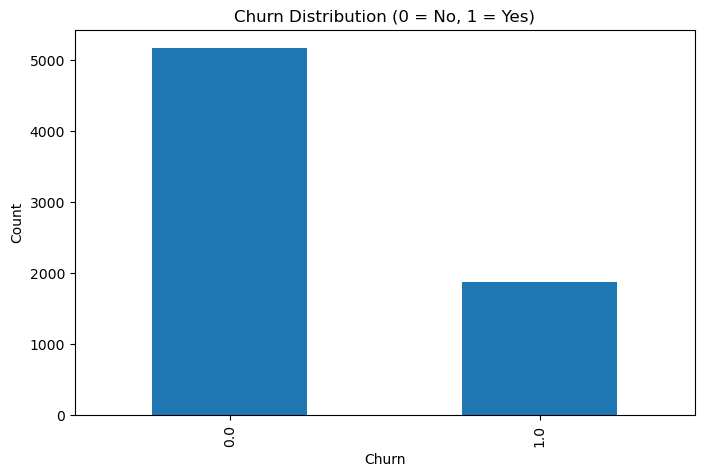

In [15]:
# Gráfico de barras para distribución de churn
plt.figure()
df_flat['Churn_flag'].value_counts().plot(kind='bar')
plt.title('Churn Distribution (0 = No, 1 = Yes)')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


### 5.3 Histograma de Tenure

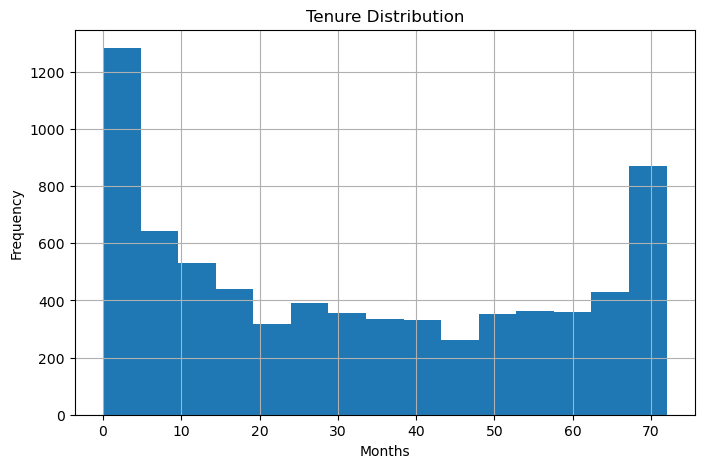

In [16]:
# Histograma de la antigüedad de clientes (meses)
plt.figure()
df_flat['customer_tenure'].hist(bins=15)
plt.title('Tenure Distribution')
plt.xlabel('Months')
plt.ylabel('Frequency')
plt.show()


### 5.4 Cargos Mensuales vs Churn

<Figure size 800x500 with 0 Axes>

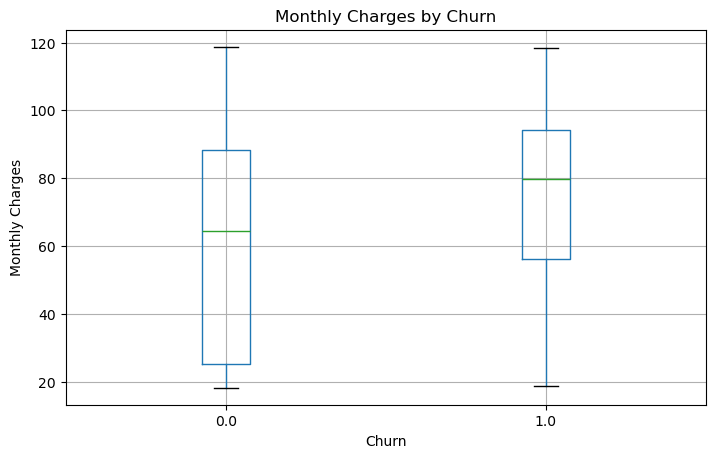

In [17]:
# Boxplot de cargos mensuales segmentado por churn
plt.figure()
df_flat.boxplot(column='account_Charges_Monthly', by='Churn_flag')
plt.title('Monthly Charges by Churn')
plt.suptitle('')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()


### 5.5 Matriz de Correlación

<Figure size 800x500 with 0 Axes>

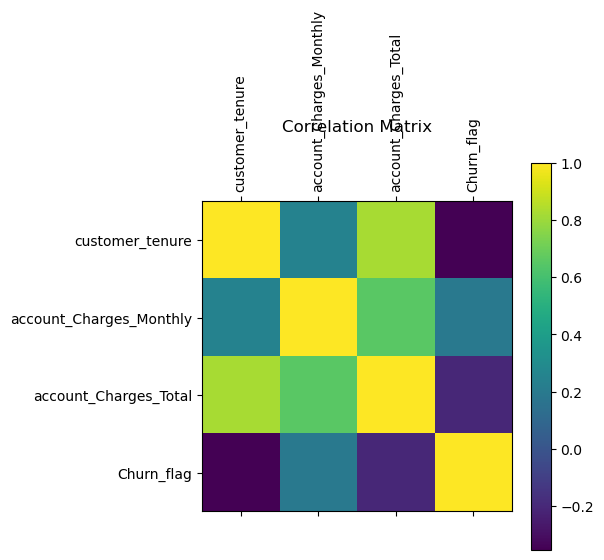

In [18]:
# Matriz de correlación para variables numéricas
numeric_cols = ['customer_tenure', 'account_Charges_Monthly', 'account_Charges_Total', 'Churn_flag']
corr = df_flat[numeric_cols].corr()

plt.figure()
plt.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title('Correlation Matrix', y=1.2)
plt.colorbar()
plt.show()
